## Dependencies

In [1]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [2]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf

In [3]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

### Keras Specific Dependencies

In [4]:
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

## Loading and Preprocessing our Data

### Load the Fashion MNIST Dataset from Keras

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
## Explore the data

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

### Preprocess the data

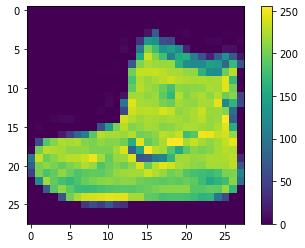

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Each Image is a 28x28 Pixel greyscale image with values from 0 to 255

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [15]:
## verify the data

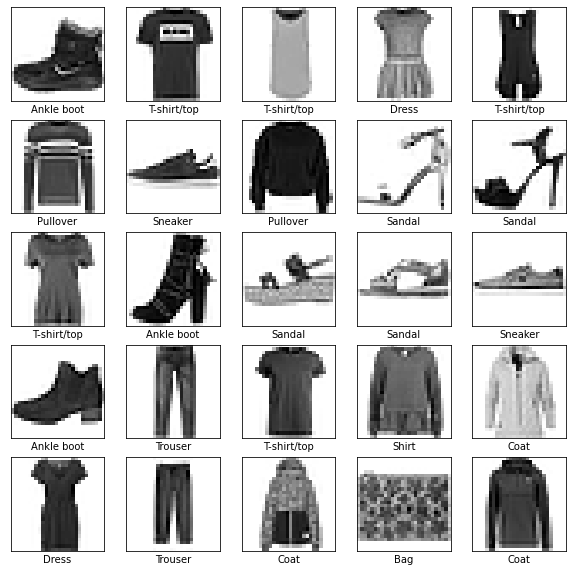

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [18]:
## Compile the model

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the MODEL


In [20]:
## Feed the model

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6179 - accuracy: 0.7839
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3846 - accuracy: 0.8621
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3430 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3168 - accuracy: 0.8839: 
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3027 - accuracy: 0.8888
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2810 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2725 - accuracy: 0.8981: 0s - loss: 0.2726 - accuracy: 
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2560 - accuracy: 0.9035: 0s - loss:
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2498 - accuracy: 0.9063
Epoch 10/10
1875/1875 [=============

## Saving and Loading models

We can save our trained models using the HDF5 binary format with the extension `.h5`

In [22]:
# Save the model
model.save("mnist_trained.h5")

In [23]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("mnist_trained.h5")

## Evaluating the Model


In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3495 - accuracy: 0.8801

Test accuracy: 0.8801000118255615


## Make predictions
We can use our trained model to make predictions using model.predict

In [25]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(test_images)

In [27]:
predictions[0]

array([1.7517874e-06, 1.8010185e-06, 1.7271690e-07, 1.3542954e-11,
       2.3851280e-07, 6.1775283e-03, 4.1444384e-08, 1.1545244e-02,
       1.5411525e-08, 9.8227316e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [30]:
## Graph this to look at the full set of 10 class predictions

In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
ax = data['region'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("Number of Battles", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

In [32]:
## Verify predictions

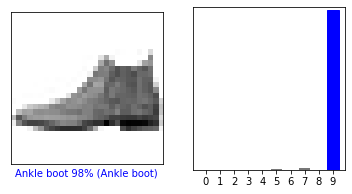

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

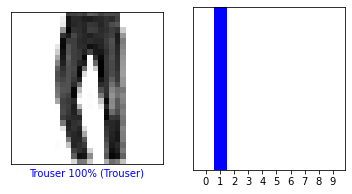

In [53]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

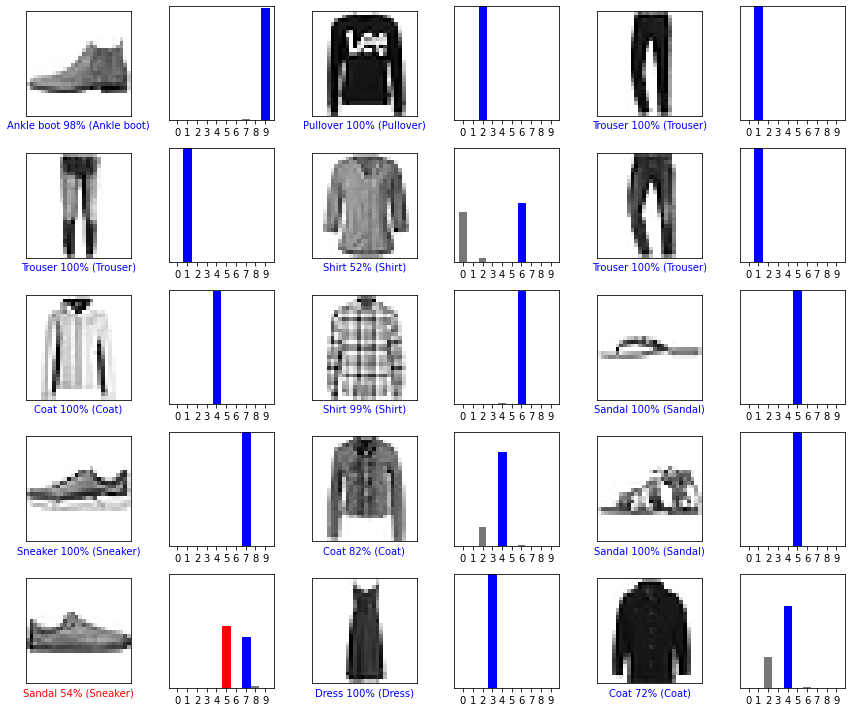

In [55]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [47]:
## Use the trained model

# Import a Custom Image

In [66]:
filepath = "Images/tshirt.png"

In [67]:
from tensorflow.keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

In [68]:
# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [69]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

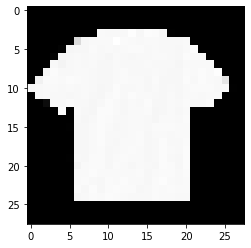

In [70]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

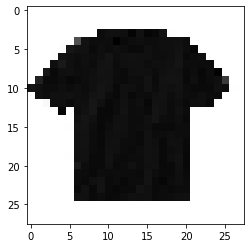

In [71]:
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [76]:
# Make predictions


In [77]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.3863233e-01 1.9271090e-07 8.7584346e-04 1.2315702e-05 3.8480131e-05
  1.8717916e-12 8.6030334e-01 3.1774542e-12 1.3748038e-04 4.2905884e-10]]


In [141]:
predictions_percentage = np.round(predictions_single, 3)*100
print(predictions_percentage)

[[13.9  0.   0.1  0.   0.   0.  86.   0.   0.   0. ]]


In [145]:
res = probability_model.predict(img)
results = [[i,r] for i,r in enumerate(res)]
results.sort(key=lambda x: x[1], reverse=True)
for r in results:
    print(class_names, str(r[1]))
    
print(predictions_percentage)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] [1.3863233e-01 1.9271090e-07 8.7584346e-04 1.2315702e-05 3.8480131e-05
 1.8717916e-12 8.6030334e-01 3.1774542e-12 1.3748038e-04 4.2905884e-10]
[[13.9  0.   0.1  0.   0.   0.  86.   0.   0.   0. ]]


In [144]:
results

[[0,
  array([1.3863233e-01, 1.9271090e-07, 8.7584346e-04, 1.2315702e-05,
         3.8480131e-05, 1.8717916e-12, 8.6030334e-01, 3.1774542e-12,
         1.3748038e-04, 4.2905884e-10], dtype=float32)]]

In [167]:
true_label = test_labels[1]
plt.grid(False)
plt.xticks(range(10), class_names, rotation=45)
plt.yticks([predictions_percentage])
plt.ylabel("(%)")
thisplot = plt.bar(range(10), predictions_single[0], color="#777777")
plt.ylim([0, 1])
predicted_label = np.argmax(predictions_single[0])

for p in thisplot:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(predictions_percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 432x288 with 1 Axes>

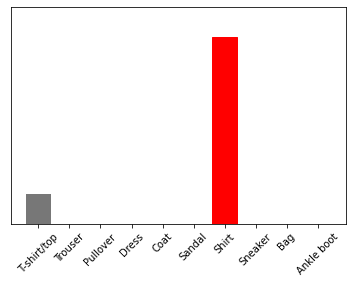

In [164]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
_ = plt.yticks()

# for i in results[0]:
#     i.annotate(predictions_percentage)
    
    
# for i in _:

#    _.annotate(i.get_x()-.03, i.get_height()+.5, \
#             str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
#                 color='dimgrey')

In [79]:
np.argmax(predictions_single[0])

6